In [1]:
import pandas as pd 
veri = pd.read_csv("seattle-weather.csv")
veri.head()
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [2]:
veri.describe()
yeni_veri= veri.rename(columns={"date":"Tarih",
                    "precipitation":"Yağış",
                    "temp_max":"maksimum_sıcaklık",
                    "temp_min":"minimum_sıcaklık",           
                    "wind":"Rüzgar",
                    "weather":"Hava_Durumu"})

## sütun isimlerini anlayabileceğimiz şekilde düzenledik
## weather değişkeninin değerleri de isimlendirilmelidir.
## ancak ilerleyen aşamalarda encoding(kategorik değişken dönüşümü) yapacağımız için bu işlem gereksiz olacaktır


## Keşifsel Veri Analizi


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
yeni_veri.describe()
## count istatistiği ile veride eksik gözlem olmadığı kısa yoldan görülebilir. 
#(her bir gözlemde 1461 adet veri bulunmaktadır)

## Diğer değişkenler ile kıyaslandığında yağış değişkeninin standart sapması yüksek çıkmıştır.
# Standart sapma, verilerin ortalama etrafındaki dağılışını ifade eden bir parametredir.
# Ancak standart sapma değeri ortalama (mean) ile kıyaslandığında oldukça yüksektir.
# Bu da yağış değerlerinin ortalamaya yakın olmadığı anlamına gelir.
#(std değeri ne kadar düşükse veriler ortalamaya o kadar yakındır ve normal dağılım gözleniyordur)

## Veri setimizin betimleyici istatistiklerinin çıktısında çeyreklik değerleri de verilmektedir.
# Buradan değişkenlerin medyan (ortanca) değerleri de rahatlıkla tespit edilebilir.
# yağış median() : 0, max sıcaklık median(): 15, min sıcaklık median(): 8.30, rüzgar median(): 3  


,Yağış,maksimum_sıcaklık,minimum_sıcaklık,Rüzgar
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,1.685421,16.439083,8.234771,3.141683
std,2.610094,7.349758,5.023004,1.273462
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,3.900000
max,7.000000,35.600000,18.300000,6.600000


In [113]:
grup = yeni_veri.groupby("Hava_Durumu")
grup.count()
## kategorik değişkenlerin veri setindeki analizine bakıldığında değişken değerlerinin
## veri setinde görülme sıklığı aşağıdaki gibidir:
#drizzle (çiseleyen yağmur):53
# fog (sisli): 101
# rain (yağmurlu): 641
# snow (karlı): 26
# sun (güneşli): 640

,Tarih,Yağış,maksimum_sıcaklık,minimum_sıcaklık,Rüzgar
Hava_Durumu,,,,,
drizzle,53,53,53,53,53
fog,101,101,101,101,101
rain,641,641,641,641,641
snow,26,26,26,26,26
sun,640,640,640,640,640


In [54]:
grup.mean()
## mean (ortalama) istatistiğinden yararlanarak şu yorumlar yapılabilir:
## sisli havalarda gözlenen ortalama verilere bakalım: 
# Sisli havalarda Seattle bölgesinde yağış gözlenmemekle birlikte maksimum sıcaklık 16.75 derece olarak gözlenmiştir. 
# rüzgar hızı ise ortalama 2.48 olarak ölçülmüştür.

# benzer şekilde Seattle bölgesinde yağış miktarının ortalama olarak karlı havalarda daha çok olduğu görülmektedir.
#(yağmurlu havalardaki yağış ortalaması: 6.55, karlı havalardaki yağış ortalaması: 8.55)

## bu verilere bakıldığında maksimum sıcaklık güneşli havalardan sonra sisli havalarda da yüksek olduğu görülmektedir.
## Bu çıkarımla Seattle Bölgesi'nde yaşayan insanlara sıcaklık uyarısı yapıbilabilir. 
## Bununla beraber karlı havalarda gözlenen 8.55 yağış oranı ile Seattle halkına şemsiye kullanmaları konusunda uyarılar yapılabilir.

,Yağış,temp_max,temp_min,Rüzgar
Hava Durumu,,,,
drizzle,0.000000,15.926415,7.111321,2.367925
fog,0.000000,16.757426,7.979208,2.481188
rain,6.557878,13.454602,7.588768,3.669891
snow,8.553846,5.573077,0.146154,4.411538
sun,0.000000,19.861875,9.343750,2.956406


In [114]:
yeni_veri

,Tarih,Yağış,maksimum_sıcaklık,minimum_sıcaklık,Rüzgar,Hava_Durumu
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## Aykırı Gözlem Analizi 

In [60]:
#### Bir veri setinde aykırı gözlemleri tespit etmenin hem görsel hem analiz değerleri olarak pek çok yöntemi vardır.
## Bu yöntemler arasında en çok uygulanan yöntemlerden biri ise "Boxplot" grafiğidir.
## Boxplot grafiği için "matplotlib" kütüphanesi veya "seaborn" kütüphanesi kullanılabilir.

In [12]:
def Grafik (x,name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(x)
    plt.title(f"{name} değişkeninin boxplot grafiği")
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    sns.histplot(x)
    plt.title(f"{name} değişkeninin histogram grafiği")

C:\Users\Victory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


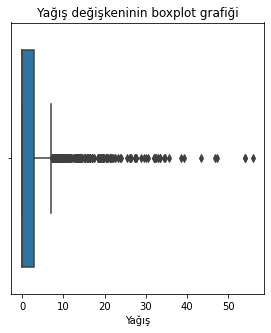

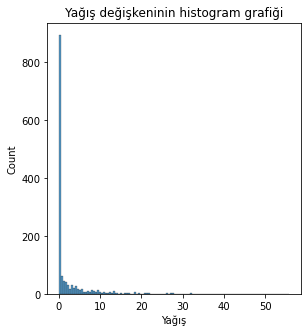

In [13]:
Grafik(yeni_veri.Yağış,"Yağış")

C:\Users\Victory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


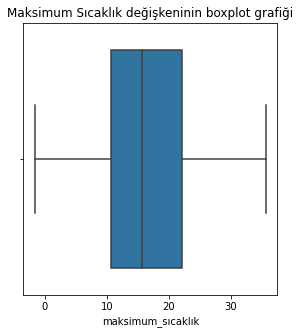

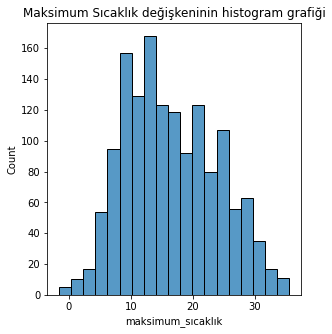

In [15]:
Grafik(yeni_veri.maksimum_sıcaklık,"Maksimum Sıcaklık")
## maksimum değişkeninde aykırı gözlem bulunmamaktadır.
## ayrıca normal dağılıma sahiptir.

C:\Users\Victory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


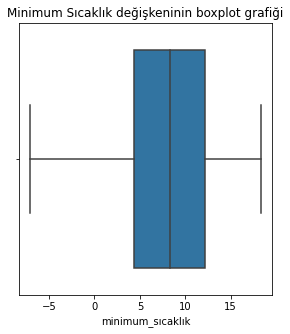

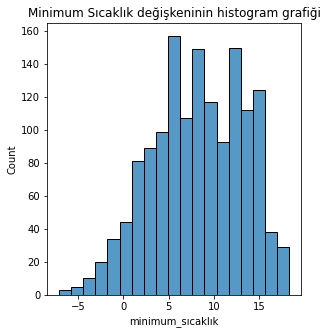

In [16]:
Grafik(yeni_veri.minimum_sıcaklık,"Minimum Sıcaklık")

C:\Users\Victory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


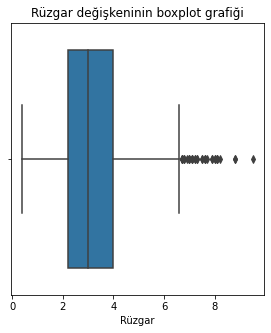

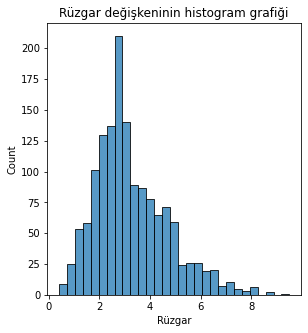

In [17]:
Grafik(yeni_veri.Rüzgar, "Rüzgar")
## Rüzgar değişkeni sağa çarpık bir dağılıma sahiptir.
## Aykırı değerlere sahiptir

In [18]:
## Kategorik değişkenler bar grafiği ile görselleştirilmektedir.
## aşağıda verilen fonksiyon ile hava durumu değişkeninin diğer değişkenlere göre bar grafiği çizdirilebilir. 
def Bar (b,name):
    sns.barplot(x="Hava_Durumu", y=b, data=yeni_veri)
    plt.title(f"Hava Durumu Değişkeninin {name} değişkenine göre bar grafiği")

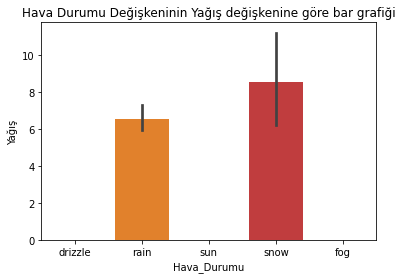

In [24]:
#Bar(yeni_veri.Rüzgar,"Rüzgar")

Bar(yeni_veri.Yağış, "Yağış")


<AxesSubplot:>

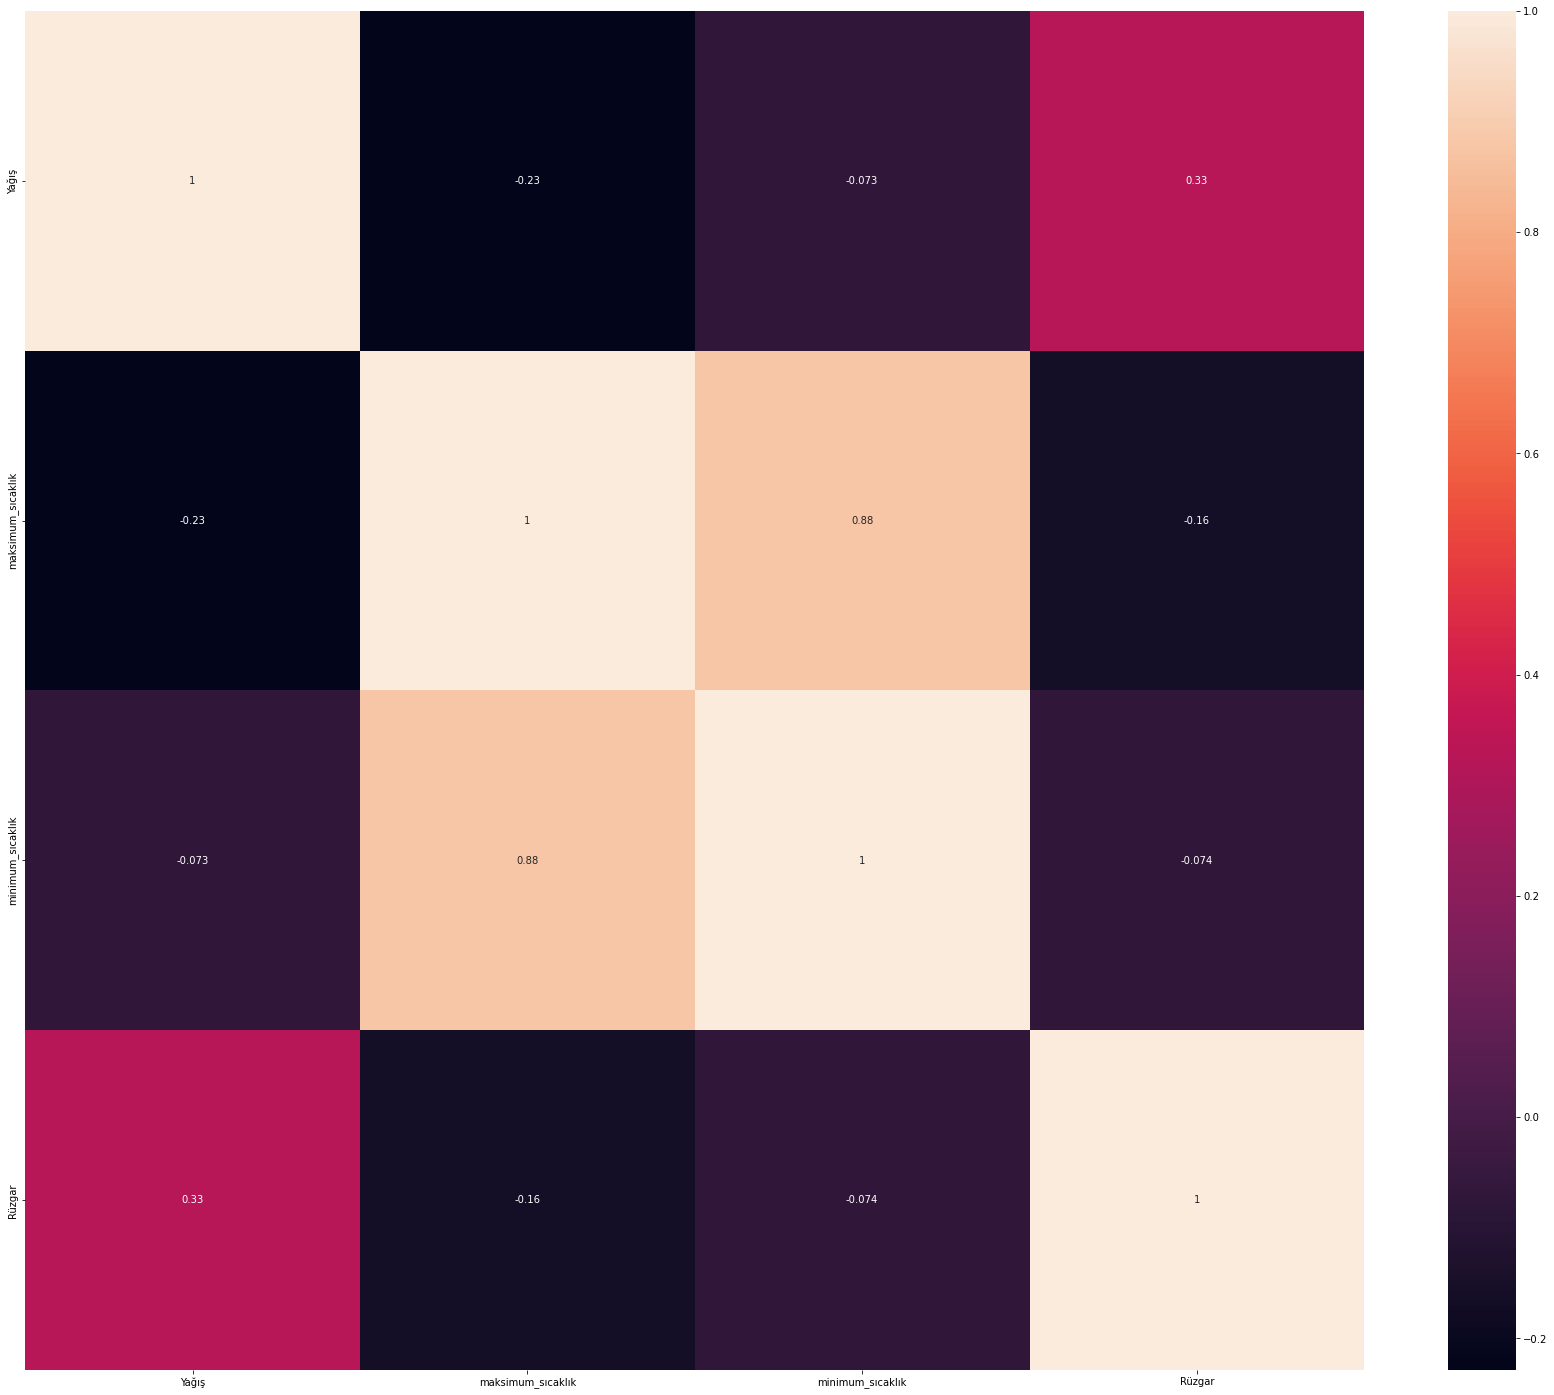

In [133]:
## Rüzgar ve yağış değişkenleri aykırı gözlemlere sahiptir. 
## Ancak çok değişkenli bir veri setimiz olduğundan bu değişkenlerin birbirleri arasında ilişkisi olup olmadığına da bakılmalıdır.
## Birbiriyle ilişkisi olan gözlemler farklı bir aykırılığa da sebebiyet verebilir.

## veri setimizde hava durumu bağlı değişken
# yağış, rüzgar, maksimum sıcaklık ve minimum sıcaklık değişkenleri bağımsız değişkenlerdir
# bağımsız değişkenlerin bağımlı değişkeni ne kadar etkilediği bizim için oldukça önemlidir. (çoklu regresyon)
# ancak şu an bununla ilgilenmeyeceğiz.

plt.figure(figsize = (30,25))

iliski= yeni_veri.corr()
sns.heatmap(iliski, annot= True)

In [7]:
## Aykırı değerleri boxplot grafiği yardımıyla yakalayabilir ve ardından çözebiliriz.
Q1 = yeni_veri.quantile(0.25)
Q3 = yeni_veri.quantile(0.75)
IQR = Q3-Q1

alt_sinir = Q1-(1.5*IQR)
ust_sinir = Q3+(1.5*IQR)

aykiri_degerler = (yeni_veri < alt_sinir) | (yeni_veri > ust_sinir)
yeni_veri[aykiri_degerler].count()

## değişkenleri aykırı değerler bulundurma sıklığı 
# Grafiklerden de tespit ettiğimiz yağış ve rüzgar değişkenlerinde sırasıyla 206 ve 34 adet aykırı gözlem bulunur.
##### Ayrıca bu aşama veri dönüşümü sonrasında da yapılabilir.!!! 

Yağış                  206
maksimum_sıcaklık        0
minimum_sıcaklık         0
Rüzgar                  34
Hava_Durumu_drizzle     53
Hava_Durumu_fog        101
Hava_Durumu_rain         0
Hava_Durumu_snow        26
Hava_Durumu_sun          0
dtype: int64

In [7]:
## Yakaladığımız aykırı değerleri 3 farklı yolla çözümleyebiliriz:
# Aykırı değer silmek
# Aykırı değerleri ortalama ile doldurmak
# Aykırı değerleri baskılamak 

## 1.Yol-Silmek
veri_silinen = yeni_veri[~ (aykiri_degerler).any(axis=1)]
## 1233 satır kaldığı görülmektedir.
## Bu işlem aykırı gözlemlerin bulunduğu satırları tamamen siler
## (sütün bazında inceleme yapar axis=1)


## 2.Yol- Ortalama ile Doldurmak
veri_yagis = yeni_veri["Yağış"]
#veri_ruzgar = yeni_veri["Rüzgar"]

Q1 = veri_yagis.quantile(0.25)
Q3 = veri_yagis.quantile(0.75)
IQR = Q3-Q1

alt_sinir = Q1-(1.5*IQR)
ust_sinir = Q3+(1.5*IQR)

##################################

#Q1 = veri_ruzgar.quantile(0.25)
#Q3 = veri_ruzgar.quantile(0.75)
#IQR = Q3-Q1

#alt_sinir = Q1-(1.5*IQR)
#ust_sinir = Q3+(1.5*IQR)

aykiri_yagis = (veri_yagis < alt_sinir) | (veri_yagis > ust_sinir)
#aykiri_ruzgar = (veri_ruzgar < alt_sinir) | (veri_ruzgar > ust_sinir)

veri_yagis[aykiri_yagis] = veri_yagis.mean()
##veri_ruzgar[aykiri_ruzgar] = veri_ruzgar.mean()

## Aykırı gözlem analizi yapılan değişenler tekrar güncellenen haliyle veri çerçevesine eklenmelidir!!!
#(Kod satırının en altında örneği mevcut)

C:\Users\Victory\AppData\Local\Temp/ipykernel_15492/1119166051.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_yagis[aykiri_yagis] = veri_yagis.mean()


In [4]:
## 3.Yol-Baskılamak
#veri_yagis = yeni_veri["Yağış"]
veri_ruzgar = yeni_veri["Rüzgar"]

#Q1 = veri_yagis.quantile(0.25)
#Q3 = veri_yagis.quantile(0.75)
#IQR = Q3-Q1

#alt_sinir = Q1-(1.5*IQR)
#ust_sinir = Q3+(1.5*IQR)

#aykiri_deger_alt = veri_yagis < alt_sinir
#aykiri_deger_ust = veri_yagis > ust_sinir

#veri_yagis[aykiri_deger_alt] = alt_sinir
#veri_yagis[aykiri_deger_ust] = ust_sinir


##################################

Q1 = veri_ruzgar.quantile(0.25)
Q3 = veri_ruzgar.quantile(0.75)
IQR = Q3-Q1

alt_sinir = Q1-(1.5*IQR)
ust_sinir = Q3+(1.5*IQR)

aykiri_deger_alt = veri_ruzgar < alt_sinir
aykiri_deger_ust = veri_ruzgar > ust_sinir

veri_ruzgar[aykiri_deger_alt] = alt_sinir
veri_ruzgar[aykiri_deger_ust] = ust_sinir

## alt sınırın altında bulunan aykırı değerler alt sınıra
## üst sınırın üstünde bulunan aykırı değerler de üst sınıra baskılandı

C:\Users\Victory\AppData\Local\Temp/ipykernel_13796/2314843944.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_ruzgar[aykiri_deger_alt] = alt_sinir
C:\Users\Victory\AppData\Local\Temp/ipykernel_13796/2314843944.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_ruzgar[aykiri_deger_ust] = ust_sinir


In [4]:
## veri setimizde onlarca aykırı gözlem bulunabilir. Bu gözlemleri çözümleyebilmek için yüzlerce satırlık kod yazmamız mümkün değil
## bu nedenle local outlier factor (cok değişkenli aykırı gözlem analizi) yapmak daha doğru olacaktır.

## Local Outlier Factor Analizinde 2 yol vardır:
# Aykırı gözlemleri silmek
# Aykırı gözlemleri baskılamak

## Aynı zamanda bir istatistikçi olarak benim tercihim aykırı gözlemleri baskılamak olur.
# Çünkü veri setimizen gözlem kaybetmeyi istemeyiz.

## Kütüphaneleri yükleyelim:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [5]:
from datetime import datetime
yeni_veri.Tarih = yeni_veri.Tarih.apply(pd.to_datetime)
yeni_veri_encoding = pd.get_dummies(data= yeni_veri, columns=["Hava_Durumu"])
silinmis= yeni_veri_encoding.drop(["Tarih"], axis=1)

## local Factor Outlier yöntemi yalnızca çok değişkenli aykırı gözlemler içindir
## Bu nedenle kategorik değişkenimiz olan hava durumu değişkenini one hot encoding ile dönüştürdük
## şimdilik tarih değişkenini sildik

clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
clf.fit_predict(silinmis)
silinmis_skor = clf.negative_outlier_factor_
silinmis_skor

array([-1.06037723, -1.00048924, -0.98765591, ..., -0.97935339,
       -0.98849917, -1.00085953])

In [17]:
## skor değerlerimizi küçükten büyüğe sıraladık
## aykırı değerler silindi

np.sort(silinmis_skor)[0:20]
esik_deger = np.sort(silinmis_skor)[1]
aykiri_olmayan_veri = silinmis_skor > esik_deger
aykiri_olan= silinmis_skor < esik_deger
temizlenmis_veri= silinmis[aykiri_olmayan_veri] 

In [19]:
temizlenmis_veri

,Yağış,maksimum_sıcaklık,minimum_sıcaklık,Rüzgar,Hava_Durumu_drizzle,Hava_Durumu_fog,Hava_Durumu_rain,Hava_Durumu_snow,Hava_Durumu_sun
0,0.0,12.8,5.0,4.7,1,0,0,0,0
1,10.9,10.6,2.8,4.5,0,0,1,0,0
2,0.8,11.7,7.2,2.3,0,0,1,0,0
3,20.3,12.2,5.6,4.7,0,0,1,0,0
4,1.3,8.9,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,0,0,1,0,0
1457,1.5,5.0,1.7,1.3,0,0,1,0,0
1458,0.0,7.2,0.6,2.6,0,1,0,0,0
1459,0.0,5.6,-1.0,3.4,0,0,0,0,1


In [20]:
silinmis
## 6 satır silinmiştir

,Yağış,maksimum_sıcaklık,minimum_sıcaklık,Rüzgar,Hava_Durumu_drizzle,Hava_Durumu_fog,Hava_Durumu_rain,Hava_Durumu_snow,Hava_Durumu_sun
0,0.0,12.8,5.0,4.7,1,0,0,0,0
1,10.9,10.6,2.8,4.5,0,0,1,0,0
2,0.8,11.7,7.2,2.3,0,0,1,0,0
3,20.3,12.2,5.6,4.7,0,0,1,0,0
4,1.3,8.9,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,0,0,1,0,0
1457,1.5,5.0,1.7,1.3,0,0,1,0,0
1458,0.0,7.2,0.6,2.6,0,1,0,0,0
1459,0.0,5.6,-1.0,3.4,0,0,0,0,1


In [22]:
baski_deger = silinmis[silinmis_skor == esik_deger]
aykiri_deger = silinmis[~aykiri_olmayan_veri]


In [23]:
res = aykiri_deger.to_records(index=False)
res[:] = baski_deger.to_records(index=False)

silinmis[~aykiri_olmayan_veri] = pd.DataFrame(res, index= silinmis[~aykiri_olmayan_veri].index)
silinmis

## aykırı değerler baskılandı

,Yağış,maksimum_sıcaklık,minimum_sıcaklık,Rüzgar,Hava_Durumu_drizzle,Hava_Durumu_fog,Hava_Durumu_rain,Hava_Durumu_snow,Hava_Durumu_sun
0,0.0,12.8,5.0,4.7,1,0,0,0,0
1,10.9,10.6,2.8,4.5,0,0,1,0,0
2,0.8,11.7,7.2,2.3,0,0,1,0,0
3,20.3,12.2,5.6,4.7,0,0,1,0,0
4,1.3,8.9,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,0,0,1,0,0
1457,1.5,5.0,1.7,1.3,0,0,1,0,0
1458,0.0,7.2,0.6,2.6,0,1,0,0,0
1459,0.0,5.6,-1.0,3.4,0,0,0,0,1


## Eksik Gözlem Analizi

In [31]:
## Eksik gözlemler ilgilenilen veri setlerinde karşılaşın bir diğer durumdur.
# aykırı gözlemler gibi eksik gözlemler de yanlılığa sebep olur.

## Eksik gözlem analizi ise 3 yol ile gerçekleşir:
# Eksik gözlemlerin silinmesi
# Eksik gözlemlerin doldurulması
# Tahmine dayalı yöntemler (makine öğrenmesi algoritmaları)


In [32]:
## Eksik gözlemleri direkt olarak silerek veri setinden kalıcı bir şekilde çıkartmak herzaman yapılmamalıdır.
## Çünkü veri setindeki gözlemler kolay bir şekilde elde edilmemektedir.
## Bu nedenle de işlem yapmadan, sektör uzmanlarının bilgisini almadan eksik gözlemler veri setinden çıkartılmamalıdır.
## aksi takdirde bilgi kaybına neden olunur


In [34]:
veri.isnull().sum()
## isnull() ve sum() komutu ile veri setindeki eksik gözlemlerin sayısı verilir
## çıktıya bakıldığında veri setinin hiçbir gözleminde eksik veri olmadığı görülür.

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [21]:
## bir veri setinde eksik veri bulunup bulunmadı miss map ile de anlaşılabilir.
import missingno as msno

<AxesSubplot:>

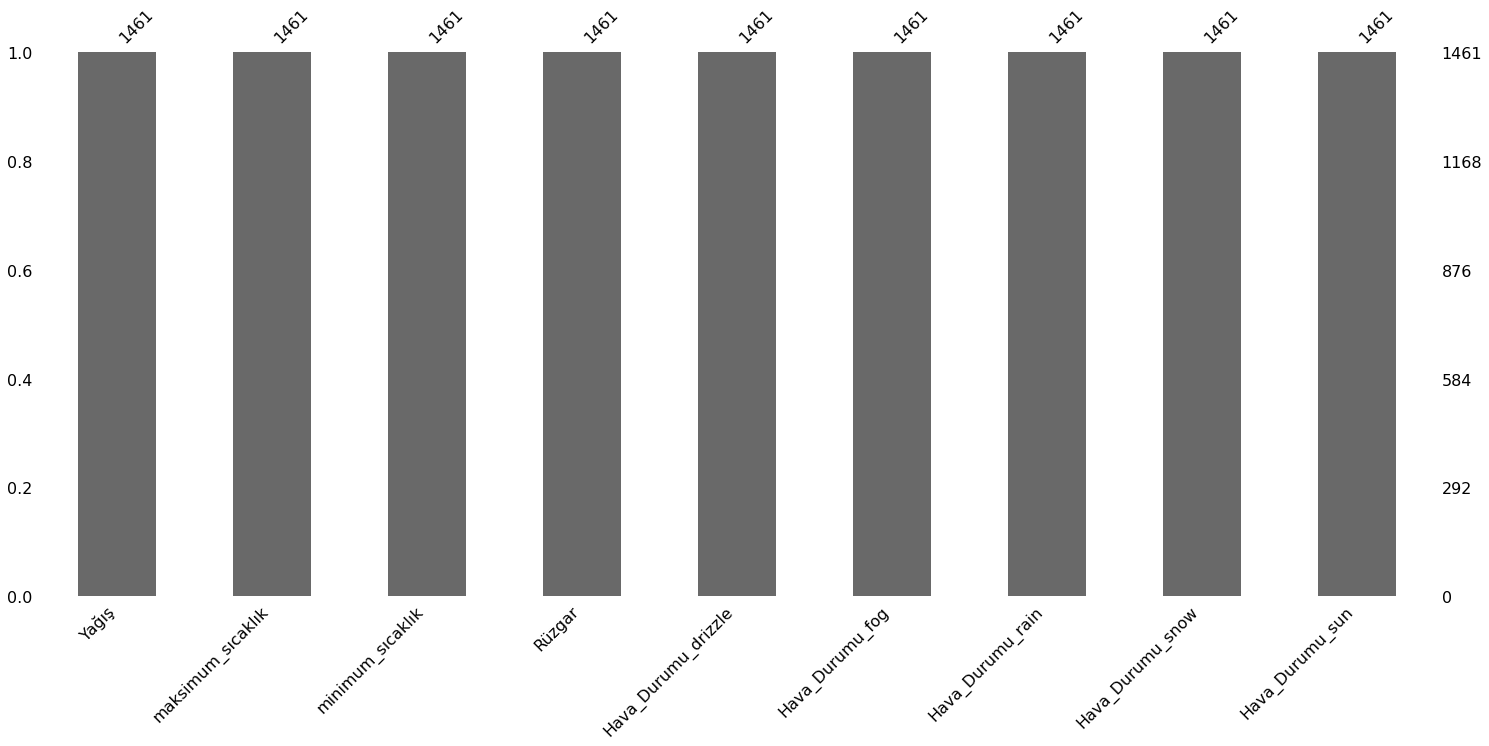

In [22]:
msno.bar(silinmis)
## miss mapte görüldüğü gibi veri setindeki tüm gözlemler 1461 adet veri içermektedir.

## Veri Standardizasyonu

In [6]:
## veri standardizasyonu adımı için örnek teşkil etmesi adına verinin işlem görmemiş halini kullanacağım.
# sadece encoding edilmiş ve tarih değişkeni silinmiş olan hali bizim için daha önemli
# çünkü ilk olarak değişkenlerin normallik testlerini yapacağız.
# bu test ile dağılımların normallikten ne kadar uzak olduğu veya normalliğe ne kadar yakın olduğunu daha iyi göreceğiz.


In [16]:
## Pek çok normallik testi bulunmaktadır. Biz daha çok kolmogrov-smirnov ve shapiro wilk testlerine odaklanacağız.
# Ancak bu testlerden de yalnızca birini kullanacağız.
# Direkt birini seçip bunu kullanacağız demeyeceğim. Çünkü o testi neden kullandığımı anlamak çok önemli.
# Bu nedenle çıktılara bakabilmek için iki testi de kullanacağız.
from scipy import stats
from scipy.stats.mstats import winsorize
import statsmodels as sm
from statsmodels.stats.diagnostic import lilliefors

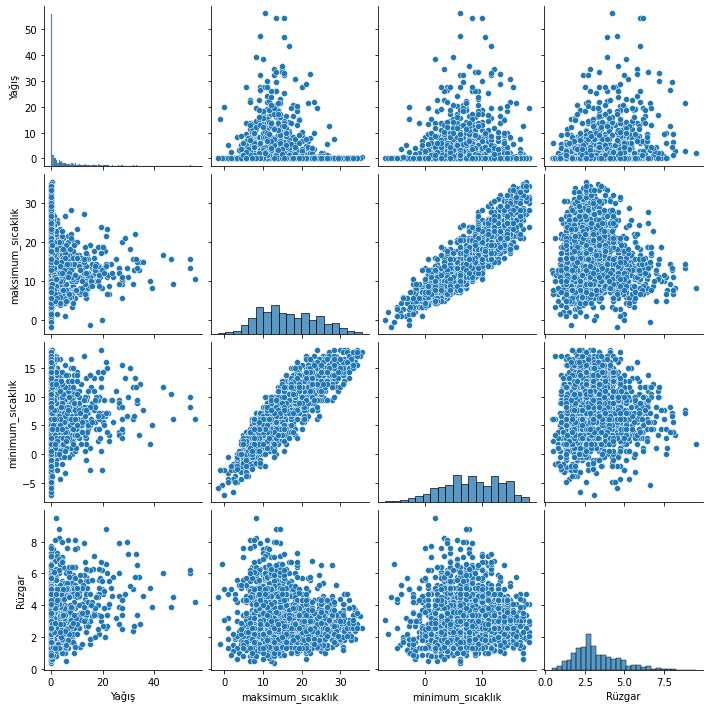

In [4]:
sns.pairplot(data=yeni_veri)
## öncelikle değişkenlerin dağılımlarına bakmak için görsellerden faydalanalım

In [11]:
def NormallikSh(x, name):
    p= stats.shapiro(x,)
    guven = 0.95
    alpha= 0.05
    print(f"{guven} düzeyinde test sonucu: {p}\n")
    
    if p[1] > alpha:
        print(f"H0 reddedilemez, {name} değişkeni normal dağılıma sahiptir.")
        
    else:
        print(f"H0 reddedilir, {name} değişkeni normal dağılıma sahip değildir.")
        
    sns.kdeplot(data=x, shade=True)
## Shapiro-Wilk testi        

In [10]:
def NormallikKs(y, name):
    p = stats.kstest(y, cdf="norm", args=(y.mean(),
                                          y.std()))
    guven = 0.95
    alpha= 0.05
    print(f"{guven} düzeyinde test sonucu: {p}\n")
    
    if p[1] > alpha:
        print(f"H0 reddedilemez, {name} değişkeni normal dağılıma sahiptir.")
        
    else:
        print(f"H0 reddedilir, {name} değişkeni normal dağılıma sahip değildir.")
        
    sns.kdeplot(data=y, shade=True)        
## Kolmogrov Smirnov Testi    

In [9]:
def NormallikLi(z, name):
    p= lilliefors(z)
    guven = 0.95
    alpha= 0.05
    print(f"{guven} düzeyinde test sonucu: {p}\n")
    
    if p[1] > alpha:
        print(f"H0 reddedilemez, {name} değişkeni normal dağılıma sahiptir.")
        
    else:
        print(f"H0 reddedilir, {name} değişkeni normal dağılıma sahip değildir.")
        
    sns.kdeplot(data=z, shade=True)
## Lilliefors Testi (Kolmogrov Smirnov testinin geliştirilmiş hali)

In [7]:
def NormallikJg(t, name):
    p= stats.jarque_bera(t)
    guven = 0.95
    alpha= 0.05
    print(f"{guven} düzeyinde test sonucu: {p} \n")
    
    if p[1] > alpha:
        print(f"H0 reddedilemez, {name} değişkeni normal dağılıma sahiptir.")
        
    else:
        print(f"H0 reddedilir, {name} değişkeni normal dağılıma sahip değildir.")
        
    sns.kdeplot(data=t, shade=True)
## Jaque Bera testi (büyük örneklemlerde çok güçlü)    

In [8]:
def NormallikAnd(v, name):
    guven= 0.95
    alpha= 0.05
    p= stats.anderson(v)
    print(f"{guven} düzeyinde test sonucu: {p}\n")

        
    sns.kdeplot(data=v, shade=True)
## Anderson Darling (Normal dağılımın dışında verinin hangi dağılıma daha yakın olduğunun tespit edilmesini sağlar)    

0.95 düzeyinde test sonucu: ShapiroResult(statistic=0.5205675959587097, pvalue=0.0)
H0 reddedilir, minimum sıcaklık değişkeni normal dağılıma sahip değildir.


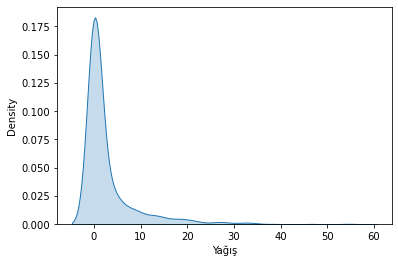

In [11]:
NormallikSh(scaled_veri.Yagis,"Yağış")

0.95 düzeyinde test sonucu: KstestResult(statistic=0.06492421858241326, pvalue=8.490556366240928e-06)

H0 reddedilir, Çiseleyen Yağmur değişkeni normal dağılıma sahip değildir.


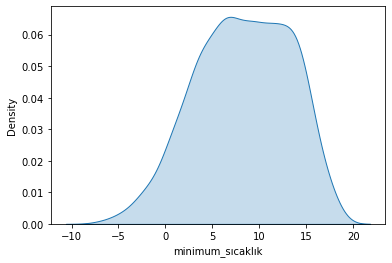

In [26]:
NormallikKs(silinmis.minimum_sıcaklık,"Çiseleyen Yağmur")

0.95 düzeyinde test sonucu: (0.06492421858241393, 0.0009999999999998899)

H0 reddedilir, Yağış değişkeni normal dağılıma sahip değildir.


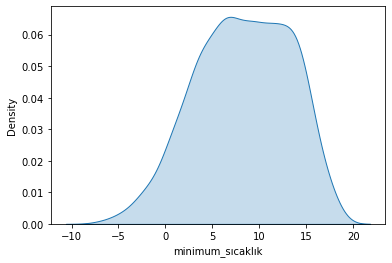

In [27]:
NormallikLi(yeni_veri.minimum_sıcaklık,"Yağış")

0.95 düzeyinde test sonucu: Jarque_beraResult(statistic=108.90840133826659, pvalue=0.0) 

H0 reddedilir, Rüzgar değişkeni normal dağılıma sahip değildir.


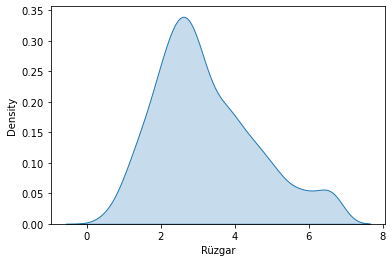

In [36]:
NormallikJg(silinmis.Rüzgar,"Rüzgar")

0.95 düzeyinde test sonucu: AndersonResult(statistic=6.1670206676076305, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))



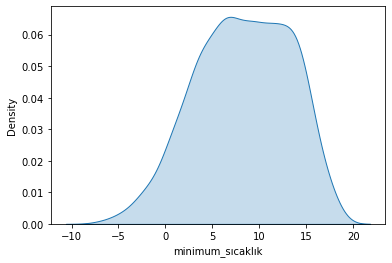

In [31]:
NormallikAnd(silinmis.minimum_sıcaklık,"Yağış")

In [5]:
## Görüldüğü gibi yalnızca grafik kullanımı normallik analizi için yeterli değildir. 
## Grafiklerde normal dağılıma sahip gibi görünen değişkenler testlerde normal değil olarak çıkmaktadır.
## Bu değişkenler normalizasyona ihtiyaç duymaktadır. Normalizasyon ise 3 şekilde yapılmaktadır:
# Standardizasyon (tree sigma)
# Normalizasyon
# Min-max dönüşümü

## değişkenler normal dağılıma sahip olmadığından standardizasyon ölçeklendirilmesi yapılamaz.
## ayrıca ölçeklendirme yöntemleri aykırı değerlerden fazlasıyla etkilenirler.
## bu nedenle aykırı değerlerin çözümü için z-score yöntemi tercih edilmemelidir( normallik varsayımı sağlanmadığı için)
## ölçeklendirme algoritmalarının doğru bir şekilde çalışabilmesi için öncelikle veri çerçevesinin
 # aykırılık ve eksiklik durumları çözümlenmelidir.

In [37]:
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [9]:
##1 yöntem Standardizasyon
# Veriye ait bilgileri bozmadan tek bir ölçeğe yerleştirir -> ortalama:0, varyans:1
scale= preprocessing.scale(yeni_veri)

## 2.yöntem Normalleştirme [0,1]
normallesme = preprocessing.normalize(yeni_veri)

## 3.yöntem Her özelliği ayrı ayrı ölçeklendirme yaparak normalleştirir
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))
scaler.fit_transform(yeni_veri)

In [4]:
from datetime import datetime
yeni_veri.Tarih = yeni_veri.Tarih.apply(pd.to_datetime)
yeni_veri_encoding = pd.get_dummies(data= yeni_veri, columns=["Hava_Durumu"])
silinmis= yeni_veri_encoding.drop(["Tarih"], axis=1)

## tarih formatı ve dönüştürülmemiş object (kategorik) veriler ölçeklendirme işleminde problem yaratabilir.
## Bu nedenle ölçeklendirme öncesi dönüşüm işlemleri ve aykırı değer çözümü tamamlanmalıdır

In [66]:
olcek_veri = MinMaxScaler().fit_transform(silinmis)

scaled_veri = pd.DataFrame(olcek_veri, columns=["Yagis",
                    "maksimum_sicaklik",
                    "minimum_sicaklik",
                    "Ruzgar",
                    "hava_durumu_ciseleyen_yagmur",
                    "hava_durumu_sisli",
                    "hava_durumu_yagmurlu",
                    "hava_durumu_karli",
                    "hava_durumu_gunesli"])
#tüm değişkenleri görebilmek için çıkarttığımız tarih değişkenini tekrar yükleyelim.
scaled_veri["Tarih"] = yeni_veri_encoding["Tarih"]
#sütünların sırasını değiştirmek için:
scaled_veri[["Tarih","Yagis",
                    "maksimum_sicaklik",
                    "minimum_sicaklik",
                    "Ruzgar",
                    "hava_durumu_ciseleyen_yagmur",
                    "hava_durumu_sisli",
                    "hava_durumu_yagmurlu",
                    "hava_durumu_karli",
                    "hava_durumu_gunesli"]] 


,Tarih,Yagis,maksimum_sicaklik,minimum_sicaklik,Ruzgar,hava_durumu_ciseleyen_yagmur,hava_durumu_sisli,hava_durumu_yagmurlu,hava_durumu_karli,hava_durumu_gunesli
0,2012-01-01,0.000000,0.387097,0.476378,0.682540,1.0,0.0,0.0,0.0,0.0
1,2012-01-02,0.439048,0.327957,0.389764,0.650794,0.0,0.0,1.0,0.0,0.0
2,2012-01-03,0.115942,0.357527,0.562992,0.301587,0.0,0.0,1.0,0.0,0.0
3,2012-01-04,0.439048,0.370968,0.500000,0.682540,0.0,0.0,1.0,0.0,0.0
4,2012-01-05,0.188406,0.282258,0.389764,0.904762,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,0.439048,0.161290,0.346457,0.396825,0.0,0.0,1.0,0.0,0.0
1457,2015-12-28,0.217391,0.177419,0.346457,0.142857,0.0,0.0,1.0,0.0,0.0
1458,2015-12-29,0.000000,0.236559,0.303150,0.349206,0.0,1.0,0.0,0.0,0.0
1459,2015-12-30,0.000000,0.193548,0.240157,0.476190,0.0,0.0,0.0,0.0,1.0


In [68]:
carpıklık =stats.skew(silinmis)
basıklık = stats.kurtosis(silinmis)

In [3]:
######################################

In [5]:
## 2.Yol- Ortalama ile Doldurmak
veri_yagis = silinmis["Yağış"]
#veri_ruzgar = yeni_veri["Rüzgar"]

Q1 = veri_yagis.quantile(0.25)
Q3 = veri_yagis.quantile(0.75)
IQR = Q3-Q1

alt_sinir = Q1-(1.5*IQR)
ust_sinir = Q3+(1.5*IQR)

##################################

#Q1 = veri_ruzgar.quantile(0.25)
#Q3 = veri_ruzgar.quantile(0.75)
#IQR = Q3-Q1

#alt_sinir = Q1-(1.5*IQR)
#ust_sinir = Q3+(1.5*IQR)

aykiri_yagis = (veri_yagis < alt_sinir) | (veri_yagis > ust_sinir)
#aykiri_ruzgar = (veri_ruzgar < alt_sinir) | (veri_ruzgar > ust_sinir)

veri_yagis[aykiri_yagis] = veri_yagis.mean()
#veri_ruzgar[aykiri_ruzgar] = veri_ruzgar.mean()
silinmis["Yağış"] = veri_yagis


C:\Users\Victory\AppData\Local\Temp/ipykernel_12244/421525396.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_yagis[aykiri_yagis] = veri_yagis.mean()


In [6]:
## 3.Yol-Baskılamak
#veri_yagis = yeni_veri["Yağış"]
veri_ruzgar = silinmis["Rüzgar"]

#Q1 = veri_yagis.quantile(0.25)
#Q3 = veri_yagis.quantile(0.75)
#IQR = Q3-Q1

#alt_sinir = Q1-(1.5*IQR)
#ust_sinir = Q3+(1.5*IQR)

#aykiri_deger_alt = veri_yagis < alt_sinir
#aykiri_deger_ust = veri_yagis > ust_sinir

#veri_yagis[aykiri_deger_alt] = alt_sinir
#veri_yagis[aykiri_deger_ust] = ust_sinir


##################################

Q1 = veri_ruzgar.quantile(0.25)
Q3 = veri_ruzgar.quantile(0.75)
IQR = Q3-Q1

alt_sinir = Q1-(1.5*IQR)
ust_sinir = Q3+(1.5*IQR)

aykiri_deger_alt = veri_ruzgar < alt_sinir
aykiri_deger_ust = veri_ruzgar > ust_sinir

veri_ruzgar[aykiri_deger_alt] = alt_sinir
veri_ruzgar[aykiri_deger_ust] = ust_sinir

silinmis["Rüzgar"] = veri_ruzgar

## alt sınırın altında bulunan aykırı değerler alt sınıra
## üst sınırın üstünde bulunan aykırı değerler de üst sınıra baskılandı

C:\Users\Victory\AppData\Local\Temp/ipykernel_12244/3240913704.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_ruzgar[aykiri_deger_alt] = alt_sinir
C:\Users\Victory\AppData\Local\Temp/ipykernel_12244/3240913704.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_ruzgar[aykiri_deger_ust] = ust_sinir


In [14]:
silinmis

,Yağış,maksimum_sıcaklık,minimum_sıcaklık,Rüzgar,Hava_Durumu_drizzle,Hava_Durumu_fog,Hava_Durumu_rain,Hava_Durumu_snow,Hava_Durumu_sun
0,0.000000,12.8,5.0,4.7,1,0,0,0,0
1,3.029432,10.6,2.8,4.5,0,0,1,0,0
2,0.800000,11.7,7.2,2.3,0,0,1,0,0
3,3.029432,12.2,5.6,4.7,0,0,1,0,0
4,1.300000,8.9,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1456,3.029432,4.4,1.7,2.9,0,0,1,0,0
1457,1.500000,5.0,1.7,1.3,0,0,1,0,0
1458,0.000000,7.2,0.6,2.6,0,1,0,0,0
1459,0.000000,5.6,-1.0,3.4,0,0,0,0,1
